In [ ]:
pip install pydicom

     |████████████████████████████████| 35.3MB 1.5MB/s 


In [ ]:
#imports
import os

from google.colab import drive
import numpy as np
import pydicom
import matplotlib as plt
from matplotlib import pyplot
import pandas as pd

# Import keras modules
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
#loading data from drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Cancer project 2020/CBIS-DDSM/Mass-test/')

In [ ]:
os.chdir('/content/drive/My Drive/Cancer project 2020/CBIS-DDSM/Mass-test/Mass-Test_P_00016_LEFT_CC/10-04-2016-DDSM-30104/1-full mammogram images-14172/')
os.listdir()

['000000.dcm']

In [ ]:
check = pydicom.read_file('000000.dcm')
check

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.255536750111234655207151937412512488011
(0008, 0020) Study Date                          DA: '20161004'
(0008, 0023) Content Date                        DA: '20160414'
(0008, 0030) Study Time                          TM: '131617'
(0008, 0033) Content Time                        TM: '121747.872000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'full mammogram images'
(0010, 0010) Patient's Name                      PN: 'Mass-Test_P_00016_LEFT_CC'
(0010, 0020) Patient ID                          LO: 'Mass-Test_P_00016_LEFT_CC'
(001

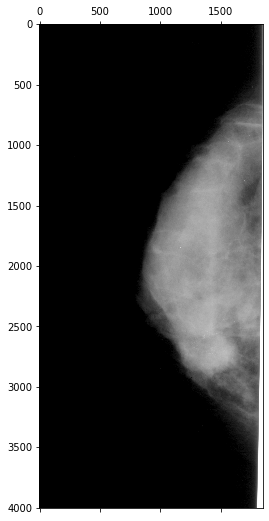

In [ ]:
pyplot.matshow(check.pixel_array)

In [ ]:
#This image is too big (about 4000 by 1800)
#Most of the image is background, and not very useful.
#I think regular resizing techniques would lose too much important information.

#Lets take a look at the first ROI image

In [ ]:
os.chdir('/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/Mass-Training_P_01817_RIGHT_MLO_1/07-21-2016-DDSM-92968/1-ROI mask images-25195')
os.listdir()

['000001.dcm', '000000.dcm']

In [ ]:
check = pydicom.read_file('000000.dcm')
check

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.258688121512723984738936083680632657174
(0008, 0020) Study Date                          DA: '20160721'
(0008, 0023) Content Date                        DA: '20160426'
(0008, 0030) Study Time                          TM: '091449'
(0008, 0033) Content Time                        TM: '145130.900000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'ROI mask images'
(0010, 0010) Patient's Name                      PN: 'Mass-Training_P_01817_RIGHT_MLO_1'
(0010, 0020) Patient ID                          LO: 'Mass-Training_P_01817_RIGHT_M

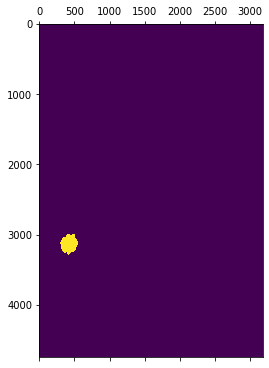

In [ ]:
pyplot.matshow(check.pixel_array)

In [ ]:
check2 = pydicom.read_file('000001.dcm')
check2

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.108062611312629334525622399241347267024
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content Date                        DA: '20160426'
(0008, 0030) Study Time                          TM: '215107'
(0008, 0033) Content Time                        TM: '145130.900000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'cropped images'
(0010, 0010) Patient's Name                      PN: 'Mass-Training_P_01817_RIGHT_MLO_1'
(0010, 0020) Patient ID                          LO: 'Mass-Training_P_01817_RIGHT_ML

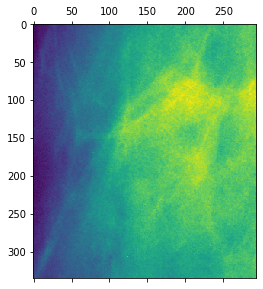

In [ ]:
pyplot.matshow(check2.pixel_array)

In [ ]:
#Each file seems to contain a mapping from the original to the roi, as well as an image of the roi
#The roi images are much better sizes. (this one is about 340 by 300) Much closer to what the imageNet networks expect.
#Using the roi images removes the immediate need for special rescaling, segmentation, or cropping that could remove valuable information.

#I will check one more just to be sure

In [ ]:
os.chdir('/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/Mass-Training_P_01821_LEFT_CC_1/07-21-2016-DDSM-94834/1-ROI mask images-36315')
os.listdir()

['000000.dcm', '000001.dcm']

In [ ]:
check2 = pydicom.read_file('000001.dcm')
check2

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.262993749411447923110389758791943003161
(0008, 0020) Study Date                          DA: '20160721'
(0008, 0023) Content Date                        DA: '20160426'
(0008, 0030) Study Time                          TM: '091453'
(0008, 0033) Content Time                        TM: '145154.806000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'ROI mask images'
(0010, 0010) Patient's Name                      PN: 'Mass-Training_P_01821_LEFT_CC_1'
(0010, 0020) Patient ID                          LO: 'Mass-Training_P_01821_LEFT_CC_1

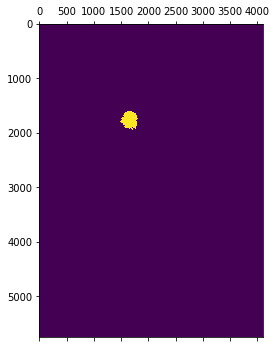

In [ ]:
pyplot.matshow(check2.pixel_array)

In [ ]:
check = pydicom.read_file('000000.dcm')
check

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.292670328012147521039737821481292833434
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content Date                        DA: '20160426'
(0008, 0030) Study Time                          TM: '215107'
(0008, 0033) Content Time                        TM: '145154.806000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'cropped images'
(0010, 0010) Patient's Name                      PN: 'Mass-Training_P_01821_LEFT_CC_1'
(0010, 0020) Patient ID                          LO: 'Mass-Training_P_01821_LEFT_CC_1'

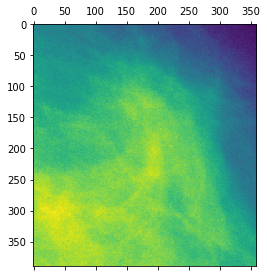

In [ ]:
pyplot.matshow(check.pixel_array)

In [ ]:
#This roi is slightly larger than the previous one, but still roughly what we want for trasfer learning.
#There does not seem to be a pattern in terms of which file comes first, the full map, or the roi.

#I will need to open each file and check for "(0008, 103e) Series Description                  LO: 'cropped images'" -> This seems to be the rois

In [ ]:
#There is an accompanying csv file with the classes as well as extra information. 
#I will open it and take a look.

os.chdir('/content/drive/My Drive/Cancer project 2020/')
os.listdir()

['CBIS-DDSM', 'CBIS-DDSM-roi', 'mass_test.csv', 'mass_train.csv']

In [ ]:
other_data = pd.read_csv('mass_train.csv')

In [ ]:
other_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
other_data.describe()

,breast_density,abnormality id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [ ]:
other_data['pathology'].describe()

count          1318
unique            3
top       MALIGNANT
freq            637
Name: pathology, dtype: object

In [ ]:
#I will check test data as well
other_data_test = pd.read_csv('mass_test.csv')

In [ ]:
other_data_test.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [ ]:
other_data_test.describe()

,breast_density,abnormality id,assessment,subtlety
count,378.000000,378.000000,378.000000,378.000000
mean,2.396825,1.092593,3.534392,3.785714
std,0.859455,0.398136,1.343076,1.171776
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,4.000000,5.000000,5.000000


In [ ]:
other_data_test['pathology'].describe()

count        378
unique         3
top       BENIGN
freq         194
Name: pathology, dtype: object

In [ ]:
#The image paths provided by the csv do not correlate to the downloaded file paths
#I will run a program to go through the folders/files
#The program will output two lists: one with the cropped image file path, the other with the class
#I will keep file paths for these images -> "(0008, 103e) Series Description                  LO: 'cropped images'"
#For each image file path kept, I will use that file path name to look up in the csv what its class is.

In [ ]:
os.chdir('/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/Mass-Training_P_01821_LEFT_CC_1/07-21-2016-DDSM-94834/')
next_seg = os.listdir()

In [ ]:
os.chdir('/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/Mass-Training_P_01821_LEFT_CC_1/07-21-2016-DDSM-94834/'+next_seg[0])
os.listdir()

['000000.dcm', '000001.dcm']

In [ ]:
# #From mass-training-roi, we add 3 segments to get to the DICOM files
# path_list = []
# base = '/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/'
# os.chdir(base)
# cases = os.listdir()
# total = 0
# for case in cases:
#     total += 1
#     print(total)
#     #next_seg1 = case
#     os.chdir(base+case)
#     middle = os.listdir()
#     os.chdir(middle[0])
#     last = os.listdir()
#     os.chdir(last[0])

#     #check which is cropped image, append to list
#     check0 = pydicom.read_file('000000.dcm')
#     check1 = pydicom.read_file('000001.dcm')
#     if check0.SeriesDescription == 'cropped images':
#         new_path = case + middle[0] + last[0] + '000000.dcm'
#         path_list.append(new_path)
#     if check1.SeriesDescription == 'cropped images':
#         new_path = case + middle[0] + last[0] + '000001.dcm'
#         path_list.append(new_path)    

# #This did not work. Some images are kept in separate subfiles. 
# #I will need a for loop at all three levels to make sure, and another at the end to capture any DICOM files.
# #I hope all images are 3 folders deep. If not, maybe print error "Does not contain DICOM"
# #Put pydicom.read_file in a try, throw error if no Dicom.

1
2
3
4


FileNotFoundError: ignored

In [ ]:
#From mass-training-roi, we add 3 segments to get to the DICOM files
path_list = []
base = '/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/'
os.chdir(base)
cases = os.listdir()
total = 0
for case in cases:
    total += 1
    print(total)
    #next_seg1 = case
    os.chdir(base+case)
    middles = os.listdir()
    for middle in middles:
        os.chdir(base+case+ '/' +middle)
        lasts = os.listdir()
        for last in lasts:
            os.chdir(base+case+ '/'+middle+ '/'+last)
            dicoms = os.listdir()
            for dicom in dicoms:
                check = pydicom.read_file(dicom)
                if check.SeriesDescription == 'cropped images':
                    new_path = base + case+ '/' + middle+ '/' + last+ '/' + dicom
                    path_list.append(new_path)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
print(len(path_list))
print(path_list[0])
print(path_list[1318])
#It looks like we have one more roi than case. This suggests at least one case had multiple rois.

1319
/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/Mass-Training_P_00437_LEFT_CC_1/07-21-2016-DDSM-56077/1-ROI mask images-42505/000001.dcm
/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-training-roi/Mass-Training_P_00437_LEFT_MLO_1/07-21-2016-DDSM-79081/1-ROI mask images-21729/000001.dcm


In [ ]:
check = pydicom.read_file(path_list[567])
check

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.363699572912960805939419685693934477911
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content Date                        DA: '20160426'
(0008, 0030) Study Time                          TM: '214951'
(0008, 0033) Content Time                        TM: '131816.123000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'cropped images'
(0010, 0010) Patient's Name                      PN: 'Mass-Training_P_01268_RIGHT_MLO_1'
(0010, 0020) Patient ID                          LO: 'Mass-Training_P_01268_RIGHT_ML

In [ ]:
#I will save the path list to drive
with open('/content/drive/My Drive/Cancer project 2020/training_paths.txt', 'w') as file:
    for path in path_list:
        file.write(path+'\n')


In [ ]:
#I will do the same for the test images
path_list = []
base = '/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-test-roi/'
os.chdir(base)
cases = os.listdir()
total = 0
for case in cases:
    total += 1
    print(total)
    os.chdir(base+case)
    middles = os.listdir()
    for middle in middles:
        os.chdir(base+case+ '/' +middle)
        lasts = os.listdir()
        for last in lasts:
            os.chdir(base+case+ '/'+middle+ '/'+last)
            dicoms = os.listdir()
            for dicom in dicoms:
                check = pydicom.read_file(dicom)
                if check.SeriesDescription == 'cropped images':
                    new_path = base + case+ '/' + middle+ '/' + last+ '/' + dicom
                    path_list.append(new_path)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
print(len(path_list))
print(path_list[0])
print(path_list[377])
#It looks like we have the same numbers.

378
/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-test-roi/Mass-Test_P_00016_LEFT_CC_1/10-04-2016-DDSM-09887/1-cropped images-26184/000001.dcm
/content/drive/My Drive/Cancer project 2020/CBIS-DDSM-roi/Mass-test-roi/Mass-Test_P_01815_RIGHT_CC_1/10-04-2016-DDSM-42934/1-ROI mask images-47010/000000.dcm


In [ ]:
#And saving this too
with open('/content/drive/My Drive/Cancer project 2020/test_paths.txt', 'w') as file:
    for path in path_list:
        file.write(path+'\n')


In [ ]:
#Last thing I need is to get the classes from the csv. The images are not in order, so I will write a program to find the case and assign the class.
os.chdir('/content/drive/My Drive/Cancer project 2020/')
test_data = pd.read_csv('mass_test.csv')
test_data = test_data.drop(test_data.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13]], axis=1)
test_data['cropped image file path'][0].split('/')[0]

'Mass-Test_P_00016_LEFT_CC_1'

In [ ]:
with open('/content/drive/My Drive/Cancer project 2020/test_paths.txt') as file:
    paths = file.readlines()

paths = [x.strip() for x in paths]    
paths[0].split('/')[7]

'Mass-Test_P_00016_LEFT_CC_1'

In [ ]:
len(paths)

#Since they are not in the same order, I will have to loop through one.
#At each iteration, I will have to look for the matching string, and then assign the class.

378

In [ ]:
#test_data['cropped image file path'][0].split('/')[0] == paths[0].split('/')[7]

test_classes = []

for i in range(len(paths)):
    for j in range(len(paths)):
        if test_data['cropped image file path'][j].split('/')[0] == paths[i].split('/')[7]:
            test_classes.append(test_data['pathology'][j])
            break

test_classes            

['MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN_WITHOUT_CALL

In [ ]:
#And saving this too
with open('/content/drive/My Drive/Cancer project 2020/test_classes.txt', 'w') as file:
    for class1 in test_classes:
        file.write(class1+'\n')


In [ ]:
train_data = pd.read_csv('mass_train.csv')
train_data = train_data.drop(train_data.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13]], axis=1)
train_data['cropped image file path'][0].split('/')[0]

'Mass-Training_P_00001_LEFT_CC_1'

In [ ]:
with open('/content/drive/My Drive/Cancer project 2020/training_paths.txt') as file:
    paths = file.readlines()

paths = [x.strip() for x in paths]    
paths[0].split('/')[7]

'Mass-Training_P_00437_LEFT_CC_1'

In [ ]:
train_classes = []

for i in range(len(paths)):
    for j in range(len(train_data)):
        if train_data['cropped image file path'][j].split('/')[0] == paths[i].split('/')[7]:
            train_classes.append(train_data['pathology'][j])
            break

train_classes 

['BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'MALIGNAN

In [ ]:
with open('/content/drive/My Drive/Cancer project 2020/train_classes.txt', 'w') as file:
    for class1 in train_classes:
        file.write(class1+'\n')


In [ ]:
#read file paths, extract images, append to list, turn to np.array, save to file

train_images = []
test_images = []

with open('/content/drive/My Drive/Cancer project 2020/training_paths.txt') as file:
    paths = file.readlines()

train_paths = [x.strip() for x in paths]   

with open('/content/drive/My Drive/Cancer project 2020/test_paths.txt') as file:
    paths = file.readlines()

test_paths = [x.strip() for x in paths]

train_count = 0
for path in train_paths:
    dicom = pydicom.read_file(path)
    train_images.append(dicom.pixel_array)
    train_count += 1
    print(train_count)

for path in test_paths:
    dicom = pydicom.read_file(path)
    test_images.append(dicom.pixel_array)

train_images = np.array(train_images)
test_images = np.array(test_images)

#Check numpy save. txt probably not best for tensor data
np.save('/content/drive/My Drive/Cancer project 2020/train_tensors.npy', train_images)
np.save('/content/drive/My Drive/Cancer project 2020/test_tensors.npy', test_images)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


(425, 443)


65535

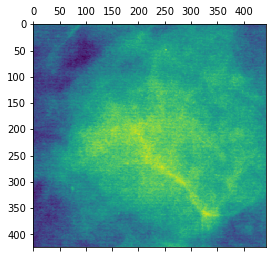

In [ ]:
print(train_images[0].shape)
pyplot.matshow(train_images[0])
train_images[0].max()